In [77]:
# Refrence
# https://www.youtube.com/watch?v=nhnLdZeKlZk&list=PLfP3JxW-T70HkhNxdgZeApdpiOfL6KAQE&index=9

In [351]:
# import Libraries
import numpy as np
# import matplotlib as plt
import matplotlib.pyplot as plt
import pandas as pd 
from sklearn.linear_model import LinearRegression
import seaborn as sns

In [352]:
data = pd.read_csv('https://raw.githubusercontent.com/attaurrahmanpl/all-csv/main/train.csv')

In [353]:
pd.set_option('display.max_columns' , None)
pd.set_option('display.max_rows' , None)
data.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2003,2003,Gable,CompShg,VinylSd,VinylSd,BrkFace,196.0,Gd,TA,PConc,Gd,TA,No,GLQ,706,Unf,0,150,856,GasA,Ex,Y,SBrkr,856,854,0,1710,1,0,2,1,3,1,Gd,8,Typ,0,NaN,Attchd,2003.0,RFn,2,548,TA,TA,Y,0,61,0,0,0,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,FR2,Gtl,Veenker,Feedr,Norm,1Fam,1Story,6,8,1976,1976,Gable,CompShg,MetalSd,MetalSd,None,0.0,TA,TA,CBlock,Gd,TA,Gd,ALQ,978,Unf,0,284,1262,GasA,Ex,Y,SBrkr,1262,0,0,1262,0,1,2,0,3,1,TA,6,Typ,1,TA,Attchd,1976.0,RFn,2,460,TA,TA,Y,298,0,0,0,0,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2001,2002,Gable,CompShg,VinylSd,VinylSd,BrkFace,162.0,Gd,TA,PConc,Gd,TA,Mn,GLQ,486,Unf,0,434,920,GasA,Ex,Y,SBrkr,920,866,0,1786,1,0,2,1,3,1,Gd,6,Typ,1,TA,Attchd,2001.0,RFn,2,608,TA,TA,Y,0,42,0,0,0,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,Corner,Gtl,Crawfor,Norm,Norm,1Fam,2Story,7,5,1915,1970,Gable,CompShg,Wd Sdng,Wd Shng,None,0.0,TA,TA,BrkTil,TA,Gd,No,ALQ,216,Unf,0,540,756,GasA,Gd,Y,SBrkr,961,756,0,1717,1,0,1,0,3,1,Gd,7,Typ,1,Gd,Detchd,1998.0,Unf,3,642,TA,TA,Y,0,35,272,0,0,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,FR2,Gtl,NoRidge,Norm,Norm,1Fam,2Story,8,5,2000,2000,Gable,CompShg,VinylSd,VinylSd,BrkFace,350.0,Gd,TA,PConc,Gd,TA,Av,GLQ,655,Unf,0,490,1145,GasA,Ex,Y,SBrkr,1145,1053,0,2198,1,0,2,1,4,1,Gd,9,Typ,1,TA,Attchd,2000.0,RFn,3,836,TA,TA,Y,192,84,0,0,0,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [354]:
data.shape

(1460, 81)

In [355]:
# data.isnull().sum()

In [356]:
# to missing values in % 
# data_miss_per = data.isnull().mean()*100
data_miss_per = data.isnull().sum() / data.shape[0] * 100 
# data_miss_per

In [357]:
# find the columns name having more 20% missing data
data_drop = data_miss_per[data_miss_per > 20].keys()
data_drop

Index(['Alley', 'FireplaceQu', 'PoolQC', 'Fence', 'MiscFeature'], dtype='object')

In [358]:
# clean_data = data.drop(columns=data_drop , axis=1)
# clean_data.shape
# data.shape
# data.drop(columns = data_drop)
# data.drop(columns = ['Alley', 'FireplaceQu', 'PoolQC', 'Fence', 'MiscFeature'])

In [359]:
# clean_data = data.drop(columns = data_drop)
# clean_data = data.drop(['Alley' , 'FireplaceQu', 'PoolQC', 'Fence', 'MiscFeature'] , axis = 1 , inplace = True)

clean_data = data.drop(columns = data_drop , axis=1)
clean_data.shape

# this will create new data set and the actual dataset will be not distrub

(1460, 76)

In [360]:
# clean_data.shape
data.shape

(1460, 81)

In [361]:
num_data = clean_data.select_dtypes(include = ['int64' , 'float64'] )
num_data.head()

,Id,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,TotRmsAbvGrd,Fireplaces,GarageYrBlt,GarageCars,GarageArea,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
0,1,60,65.0,8450,7,5,2003,2003,196.0,706,0,150,856,856,854,0,1710,1,0,2,1,3,1,8,0,2003.0,2,548,0,61,0,0,0,0,0,2,2008,208500
1,2,20,80.0,9600,6,8,1976,1976,0.0,978,0,284,1262,1262,0,0,1262,0,1,2,0,3,1,6,1,1976.0,2,460,298,0,0,0,0,0,0,5,2007,181500
2,3,60,68.0,11250,7,5,2001,2002,162.0,486,0,434,920,920,866,0,1786,1,0,2,1,3,1,6,1,2001.0,2,608,0,42,0,0,0,0,0,9,2008,223500
3,4,70,60.0,9550,7,5,1915,1970,0.0,216,0,540,756,961,756,0,1717,1,0,1,0,3,1,7,1,1998.0,3,642,0,35,272,0,0,0,0,2,2006,140000
4,5,60,84.0,14260,8,5,2000,2000,350.0,655,0,490,1145,1145,1053,0,2198,1,0,2,1,4,1,9,1,2000.0,3,836,192,84,0,0,0,0,0,12,2008,250000


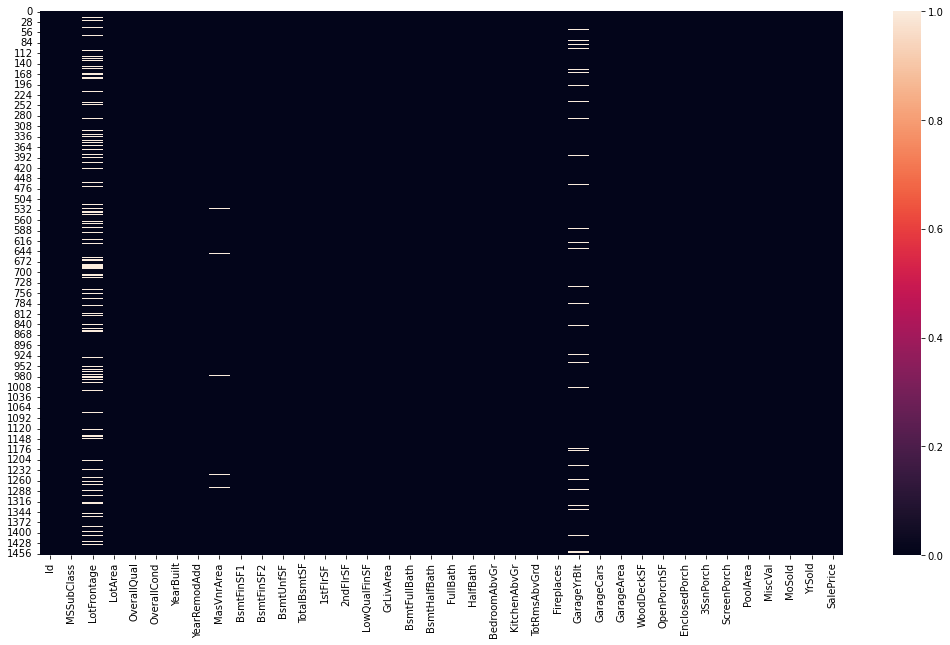

In [362]:
# now check on heat map for missing values of numerica datafream
plt.figure(figsize= (18 , 10 ))
sns.heatmap(num_data.isnull())
plt.show()
# from heat map we can find that three columns having missing values

In [363]:
# Multiple ways to find null value in numeric data fram

# num_data_miss_columns = [var for var in num_data.columns if num_data[var].isnull().sum() > 0]


# for var in num_data.columns:
#     if num_data[var].isnull().sum() > 0:
#         print(var)

num_data_miss_per = num_data.isnull().mean()*100
num_data_miss_columns = num_data_miss_per[num_data_miss_per > 0].keys()
num_data_miss_columns




Index(['LotFrontage', 'MasVnrArea', 'GarageYrBlt'], dtype='object')

C:\Users\Attaur Rahman\anaconda3\envs\Machine_Learning\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\Attaur Rahman\anaconda3\envs\Machine_Learning\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\Attaur Rahman\anaconda3\envs\Machine_Learning\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use eith

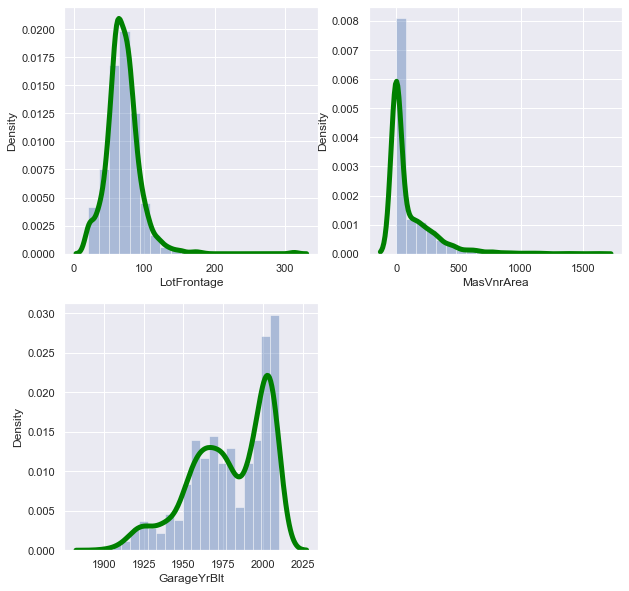

In [432]:
plt.figure(figsize=(10, 10))
sns.set()
for i, var in enumerate (num_data_miss_columns):
    plt.subplot (2,2,i+1)
    sns.distplot(num_data[var], bins=20, kde_kws={'linewidth' : 5 , 'color' : 'green'})


# from IPython.display import Image
  
# # get the image
# Image(url="Capture.PNG", width=900, height=500)

In [434]:
# name = ['atta' , 'salman' , 'sajid' , 'dqrar']
# ase = 0
# for names in name:
#     print (ase , '----->'  , names)
#     ase+=1

# for ase , names in enumerate(name):
#     print(ase , '----->' , names)
# import image module

# def find_index(a , b):
#     for i in a:
#         if i == b:
#             return (a.index(i))
#     else:
#         print(-1)
        
        

        
# atta = ['sajid' , 'iqrara' , 'salman']      
# names = 2
# find_index(atta, 'salman')

In [454]:
num_data_mean = num_data.fillna(num_data.mean())
# num_data.mean()
# num_data_clean

In [455]:
num_data_mode = num_data.fillna(num_data.median())


C:\Users\Attaur Rahman\anaconda3\envs\Machine_Learning\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\Attaur Rahman\anaconda3\envs\Machine_Learning\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\Attaur Rahman\anaconda3\envs\Machine_Learning\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use eith

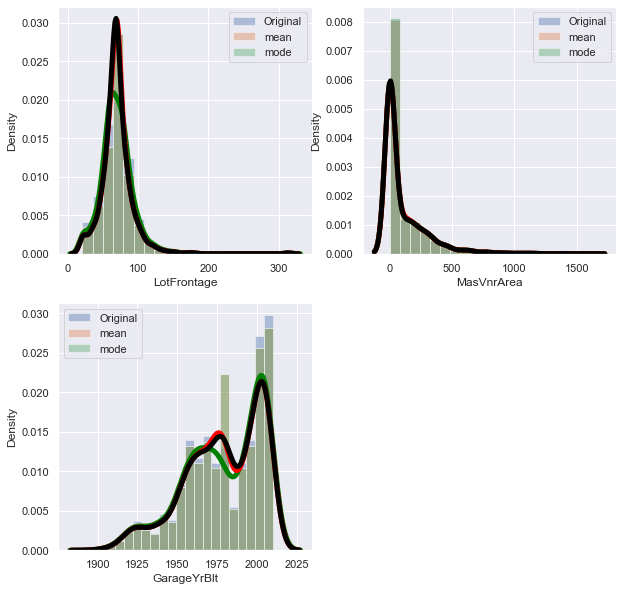

In [456]:
plt.figure(figsize=(10, 10))
sns.set()
for i, var in enumerate (num_data_miss_columns):
    plt.subplot (2,2,i+1)
    sns.distplot(num_data[var], bins=20, kde_kws={'linewidth' : 5 , 'color' : 'green'} , label= 'Original')
    sns.distplot(num_data_mean[var], bins=20, kde_kws={'linewidth' : 5 , 'color' : 'red'} , label= 'mean')
    sns.distplot(num_data_mode[var], bins=20, kde_kws={'linewidth' : 5 , 'color' : 'black'} , label= 'mode')
    plt.legend()
    

In [460]:
num_data_mean.shape

(1460, 38)

# create new clean dataset

In [469]:
# create new clean dataset
data2 = data.fillna(num_data_mean)

In [464]:
data2.shape

(1460, 81)

In [470]:
data_cat = data2.select_dtypes(include= ['object'])

In [471]:
data_cat.shape

(1460, 43)

In [473]:
data_cat_per = data_cat.isnull().mean()*100
data_cat_per

MSZoning          0.000000
Street            0.000000
Alley            93.767123
LotShape          0.000000
LandContour       0.000000
Utilities         0.000000
LotConfig         0.000000
LandSlope         0.000000
Neighborhood      0.000000
Condition1        0.000000
Condition2        0.000000
BldgType          0.000000
HouseStyle        0.000000
RoofStyle         0.000000
RoofMatl          0.000000
Exterior1st       0.000000
Exterior2nd       0.000000
MasVnrType        0.547945
ExterQual         0.000000
ExterCond         0.000000
Foundation        0.000000
BsmtQual          2.534247
BsmtCond          2.534247
BsmtExposure      2.602740
BsmtFinType1      2.534247
BsmtFinType2      2.602740
Heating           0.000000
HeatingQC         0.000000
CentralAir        0.000000
Electrical        0.068493
KitchenQual       0.000000
Functional        0.000000
FireplaceQu      47.260274
GarageType        5.547945
GarageFinish      5.547945
GarageQual        5.547945
GarageCond        5.547945
P

In [474]:
data_cat_gre_20 = data_cat_per[data_cat_per > 20].keys()
data_cat_gre_20

Index(['Alley', 'FireplaceQu', 'PoolQC', 'Fence', 'MiscFeature'], dtype='object')

In [476]:
data_cat_clean = data2.drop(columns = data_cat_gre_20 , axis = 1)
data_cat_clean.shape

(1460, 76)

In [477]:
data2.shape

(1460, 81)

In [489]:
new = data_cat_clean.isnull().mean()*100
new

Id               0.000000
MSSubClass       0.000000
MSZoning         0.000000
LotFrontage      0.000000
LotArea          0.000000
Street           0.000000
LotShape         0.000000
LandContour      0.000000
Utilities        0.000000
LotConfig        0.000000
LandSlope        0.000000
Neighborhood     0.000000
Condition1       0.000000
Condition2       0.000000
BldgType         0.000000
HouseStyle       0.000000
OverallQual      0.000000
OverallCond      0.000000
YearBuilt        0.000000
YearRemodAdd     0.000000
RoofStyle        0.000000
RoofMatl         0.000000
Exterior1st      0.000000
Exterior2nd      0.000000
MasVnrType       0.547945
MasVnrArea       0.000000
ExterQual        0.000000
ExterCond        0.000000
Foundation       0.000000
BsmtQual         2.534247
BsmtCond         2.534247
BsmtExposure     2.602740
BsmtFinType1     2.534247
BsmtFinSF1       0.000000
BsmtFinType2     2.602740
BsmtFinSF2       0.000000
BsmtUnfSF        0.000000
TotalBsmtSF      0.000000
Heating     

In [486]:
cat_mode = new[new > 0].keys()
cat_mode

Index(['MasVnrType', 'BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1',
       'BsmtFinType2', 'Electrical', 'GarageType', 'GarageFinish',
       'GarageQual', 'GarageCond'],
      dtype='object')

In [ ]:
data22 = data2.fillna